In [44]:
# STEP 1: Import Required Libraries
!pip install pandas plotly dash
!pip install wordcloud
!pip install squarify
!pip install joypy


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify   # for treemap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# STEP 2: Load the Dataset
df = pd.read_csv('COVID clinical trials.csv')
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (5783, 27)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [9]:
print(df.columns.tolist())
# Safe feature selection
features = [col for col in ["Phases","Enrollment","Gender","Age","Study Type","Country"] if col in df.columns]

data = df[features].copy()


['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']


In [10]:
# Handle missing + encode
for col in data.columns:
    data[col] = data[col].astype(str)

le_dict = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

In [11]:
# Scale Enrollment
scaler = StandardScaler()
if "Enrollment" in data.columns:
    data["Enrollment"] = scaler.fit_transform(data[["Enrollment"]])

In [13]:
print(df.columns.tolist())
# If column is named "Status"
df["Target"] = df["Status"].apply(
    lambda x: "Completed" if "Completed" in str(x) else "Not_Completed"
)

# If column is named differently (example: "Recruitment Status")
# df["Target"] = df["Recruitment Status"].apply(
#     lambda x: "Completed" if "Completed" in str(x) else "Not_Completed"
# )
X = data
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']


In [14]:
# Train Model
model = RandomForestClassifier(n_estimators=250, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

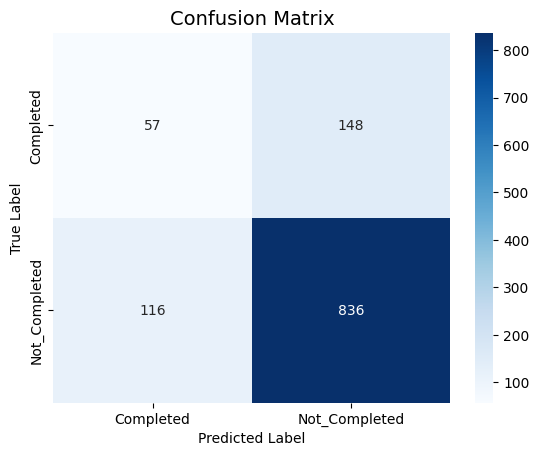

In [15]:
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=["Completed","Not_Completed"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Completed","Not_Completed"], yticklabels=["Completed","Not_Completed"])
plt.title("Confusion Matrix", fontsize=14)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


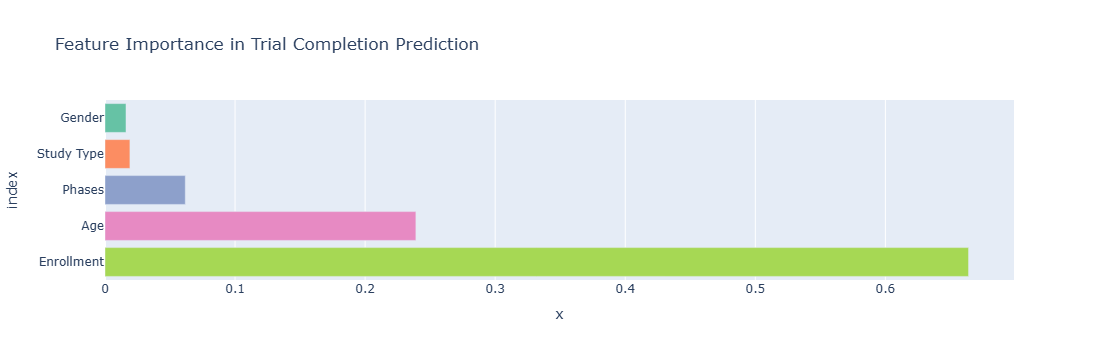

In [19]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

fig = px.bar(
    importances,
    x=importances.values,
    y=importances.index,
    orientation="h",
    title="Feature Importance in Trial Completion Prediction",
    color=importances.index,   #  color by feature name (categorical)
    color_discrete_sequence=px.colors.qualitative.Set2  # nice diverse palette
)

fig.update_layout(showlegend=False)  # legend not needed
fig.show()


In [18]:
# 3. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

    Completed       0.33      0.28      0.30       205
Not_Completed       0.85      0.88      0.86       952

     accuracy                           0.77      1157
    macro avg       0.59      0.58      0.58      1157
 weighted avg       0.76      0.77      0.76      1157



In [23]:
# Treemap (Top Countries)
# ------------------------------
if "Country" in df.columns and squarify:
    country_counts = df["Country"].value_counts().head(15)
    plt.figure(figsize=(10,6))
    squarify.plot(sizes=country_counts.values, label=country_counts.index,
                  alpha=0.8, color=sns.color_palette("Spectral", 15))
    plt.title("Top 15 Countries by Clinical Trials (Treemap)", fontsize=14)
    plt.axis('off')
    plt.show()
else:
    print(" Skipping Treemap (Country column or squarify not available).")

 Skipping Treemap (Country column or squarify not available).


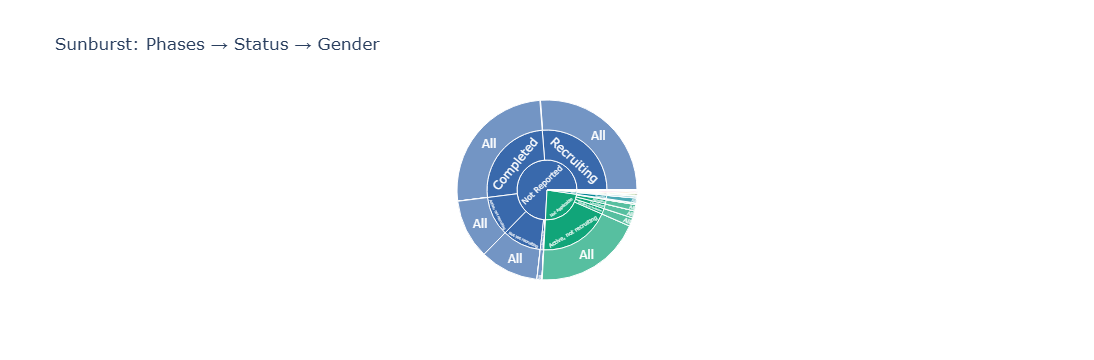

In [26]:
# Ensure no missing values in hierarchy columns
for col in ["Phases","Status","Gender"]:
    if col in df.columns:
        df[col] = df[col].astype(str).replace(["nan","None","Unknown"], "Not Reported")
        df[col] = df[col].fillna("Not Reported")

# Sunburst Chart
if {"Phases","Status","Gender"}.issubset(df.columns):
    fig = px.sunburst(
        df,
        path=["Phases","Status","Gender"],
        values="Enrollment" if "Enrollment" in df.columns else None,
        title=" Sunburst: Phases → Status → Gender",
        color="Phases",
        color_discrete_sequence=px.colors.qualitative.Bold
    )
    fig.show()


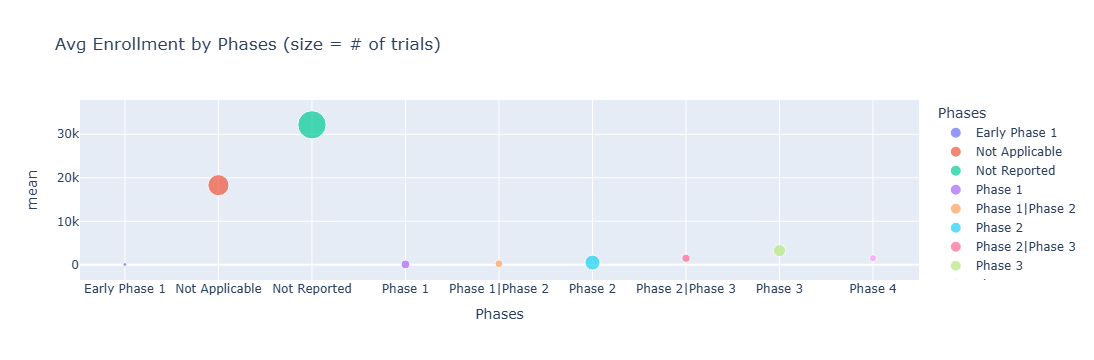

In [50]:
# 3.  Enrollment vs Phases
if {"Phases","Enrollment"}.issubset(df.columns):
    bubble_data = df.groupby("Phases")["Enrollment"].agg(["mean","count"]).reset_index()
    fig = px.scatter(
        bubble_data,
        x="Phases",
        y="mean",
        size="count",
        color="Phases",
        hover_data=["count"],
        title="  Avg Enrollment by Phases (size = # of trials)"
    )
    fig.show()

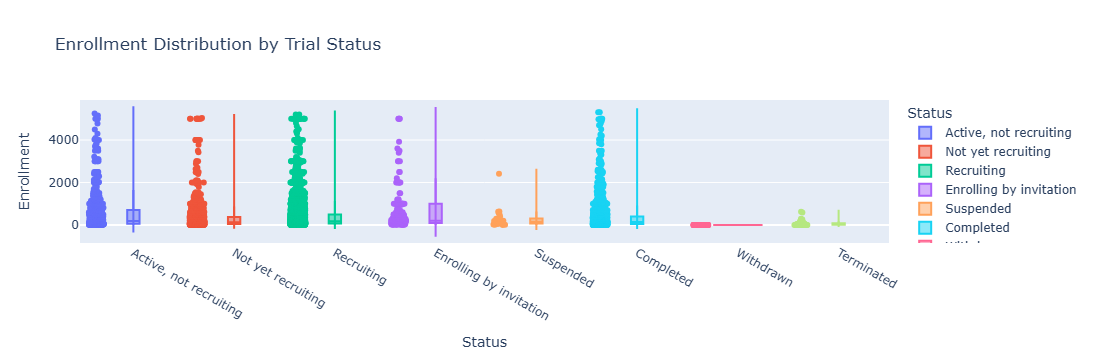

In [34]:
# 4. Enrollment by Status
if {"Status","Enrollment"}.issubset(df.columns):
    fig = px.violin(
        df[df["Enrollment"] < df["Enrollment"].quantile(0.95)], # remove outliers
        x="Status",
        y="Enrollment",
        box=True,
        points="all",
        color="Status",
        title="  Enrollment Distribution by Trial Status"
    )
    fig.show()

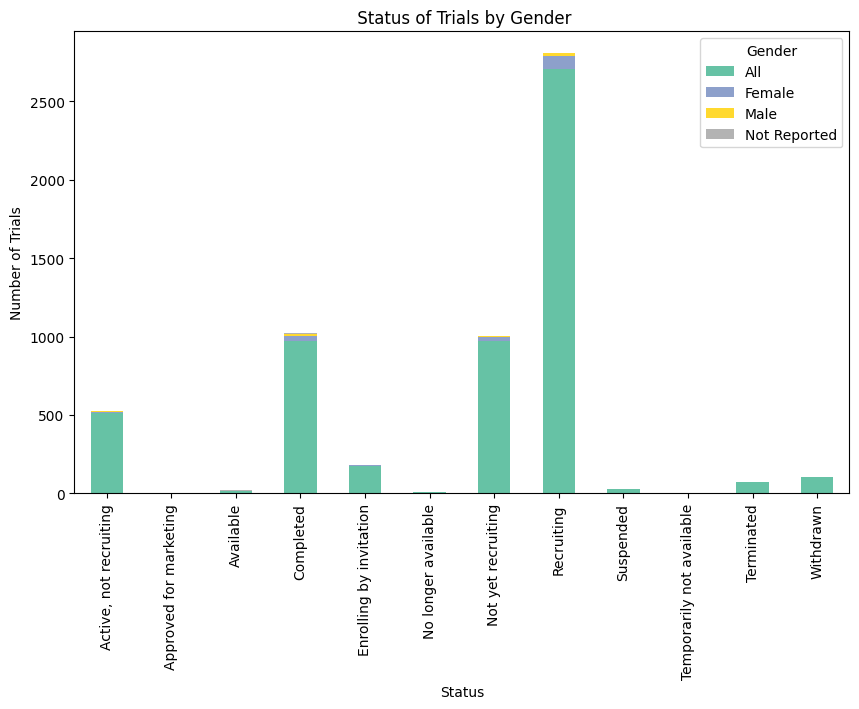

In [36]:
# 5. Status by Gender
if {"Status","Gender"}.issubset(df.columns):
    stacked_data = pd.crosstab(df["Status"], df["Gender"])
    stacked_data.plot(
        kind="bar",
        stacked=True,
        figsize=(10,6),
        colormap="Set2"
    )
    plt.title(" Status of Trials by Gender")
    plt.xlabel("Status")
    plt.ylabel("Number of Trials")
    plt.legend(title="Gender")
    plt.show()

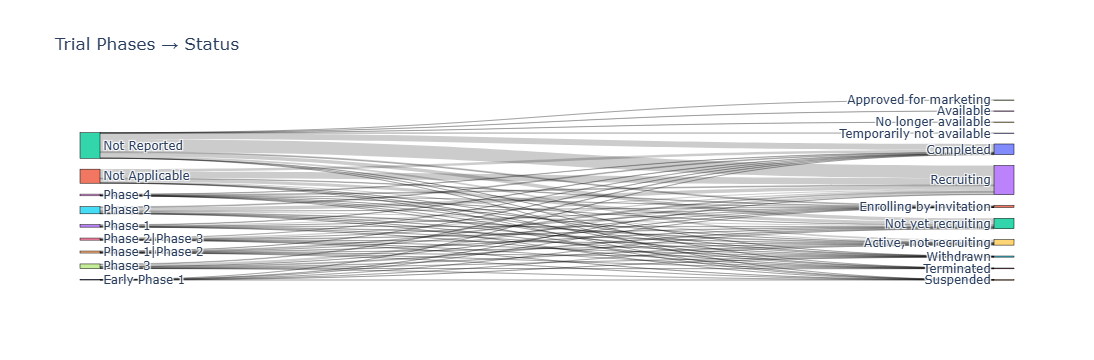

In [40]:
import plotly.graph_objects as go

if {"Phases","Status"}.issubset(df.columns):
    phase_counts = df.groupby(["Phases","Status"]).size().reset_index(name="count")
    
    labels = list(phase_counts["Phases"].unique()) + list(phase_counts["Status"].unique())
    source = phase_counts["Phases"].map({v:i for i,v in enumerate(labels)}).tolist()
    target = phase_counts["Status"].map({v:i for i,v in enumerate(labels)}).tolist()
    
    fig = go.Figure(data=[go.Sankey(
        node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
        link=dict(source=source, target=target, value=phase_counts["count"])
    )])
    fig.update_layout(title_text= "Trial Phases → Status", font_size=12)
    fig.show()
